In [1]:
import os
from utils.configuration import *
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [2]:
experiment_name = "api_ordinal_wine_example"      ## <--- set experiment name
LOG_DIR="/home/bule/TramDag/dev_experiment_logs"  ## <--- set log directory
EXPERIMENT_DIR = os.path.join(LOG_DIR, experiment_name)
CONF_DICT_PATH = os.path.join(EXPERIMENT_DIR, f"configuration.json")

In [3]:
setup_configuration(experiment_name,EXPERIMENT_DIR)

Configuration already exists/home/bule/TramDag/dev_experiment_logs/api_ordinal_wine_example/configuration.json


In [4]:
# Load the dataset
wine = load_wine()

df=pd.DataFrame(wine['data'], columns=wine['feature_names'])
df['target']=wine['target']
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [5]:
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

In [6]:
data_type={key:value for key, value in zip(train_df.columns, ['continous']*13+['ordinal_Xc_Yo'])}
data_type

{'alcohol': 'continous',
 'malic_acid': 'continous',
 'ash': 'continous',
 'alcalinity_of_ash': 'continous',
 'magnesium': 'continous',
 'total_phenols': 'continous',
 'flavanoids': 'continous',
 'nonflavanoid_phenols': 'continous',
 'proanthocyanins': 'continous',
 'color_intensity': 'continous',
 'hue': 'continous',
 'od280/od315_of_diluted_wines': 'continous',
 'proline': 'continous',
 'target': 'ordinal_Xc_Yo'}

In [7]:
write_data_type_to_configuration(data_type, CONF_DICT_PATH)

---------------------------------------------------------------------------------------------------------
                                       |                       MODEL SETTINGS                       
Variable             | dtype           | As Predictor                   | As Target                     
---------------------------------------------------------------------------------------------------------
alcohol              | continous       | continuous [c]                 | continuous [c]                
malic_acid           | continous       | continuous [c]                 | continuous [c]                
ash                  | continous       | continuous [c]                 | continuous [c]                
alcalinity_of_ash    | continous       | continuous [c]                 | continuous [c]                
magnesium            | continous       | continuous [c]                 | continuous [c]                
total_phenols        | continous       | continuous [c]  

/home/bule/TramDag/utils/configuration.py:115: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


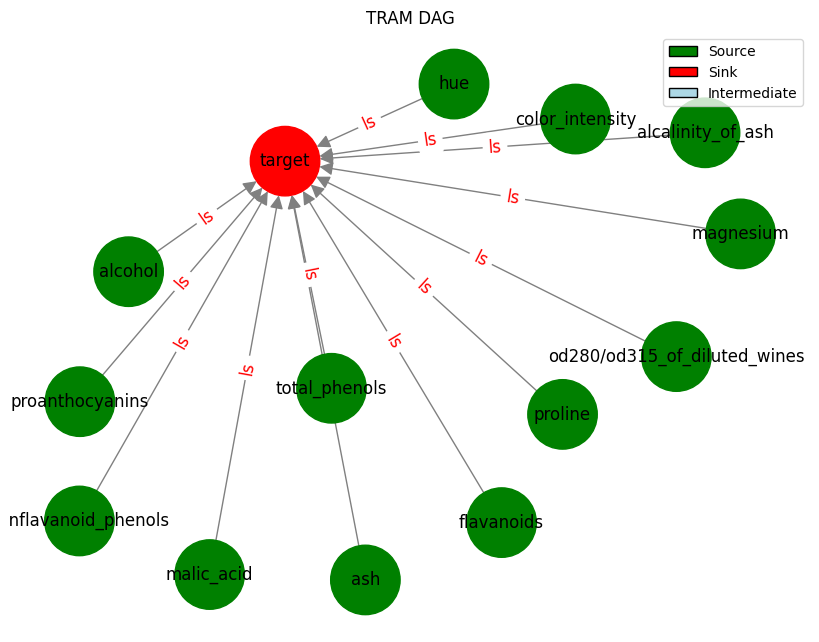

In [8]:
interactive_adj_matrix(CONF_DICT_PATH,seed=19)

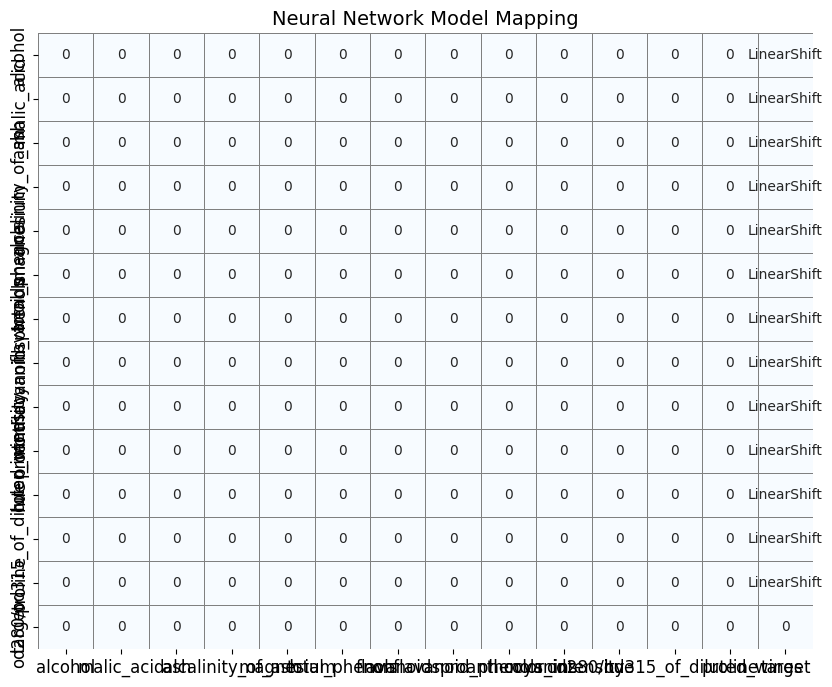

In [9]:
interactive_nn_names_matrix(CONF_DICT_PATH, seed=5)

In [10]:
from utils.tramdag import TramDagConfig , TramDagModel

cfg = TramDagConfig.load("/home/bule/TramDag/dev_experiment_logs/api_ordinal_wine_example/configuration.json")
cfg.compute_levels(train_df)
device='cpu'

In [11]:
td_model = TramDagModel.from_config(cfg, set_initial_weights=True,verbose=True,debug=True,device=device,initial_data = train_df) 
# 1m52s

[DEBUG] TramDagModel using device: cpu

[INFO] Building model for node 'alcohol' with settings: {'set_initial_weights': True, 'debug': True, 'verbose': True, 'device': 'cpu', 'initial_data':      alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
158    14.34        1.68  2.70               25.0       98.0           2.80   
137    12.53        5.51  2.64               25.0       96.0           1.79   
98     12.37        1.07  2.10               18.5       88.0           3.52   
159    13.48        1.67  2.64               22.5       89.0           2.60   
38     13.07        1.50  2.10               15.5       98.0           2.40   
..       ...         ...   ...                ...        ...            ...   
71     13.86        1.51  2.67               25.0       86.0           2.95   
106    12.25        1.73  2.12               19.0       80.0           1.65   
14     14.38        1.87  2.38               12.0      102.0           3.30   
92     12.69       

In [12]:
td_model.fit(train_df, val_df,
            #  train_list=['target'],
             learning_rate=1e-3,
             epochs=15,batch_size=10,
             save_linear_shifts=True,
             verbose=True,debug=False,
             device=device,
             num_workers = 8,
             persistent_workers = True,
             prefetch_factor = 8,
             train_mode = "sequential")#,

#30 eps 1m 49s seq mode from start 1000 bs
#30 eps 2m 27s parllel multiprocessing mode from start 1000 bs
# 200 eps 9m 30s seq mode from start 1000 bs

[INFO] Computing new minmax dict from training data...
[INFO] Saved new minmax dict to /home/bule/TramDag/dev_experiment_logs/api_ordinal_wine_example/min_max_scaling.json
[INFO] Training 14 nodes (sequential) on cpu

[INFO] Training node 'alcohol' for 15 epochs on cpu (pid=488855)
[INFO] No existing model found. Starting fresh...


Saved new best model.
Epoch 1/15  Train NLL: 3.7042  Val NLL: 3.7644  [Train: 0.43s  Val: 0.19s  Total: 0.63s]
Saved new best model.
Epoch 2/15  Train NLL: 3.6885  Val NLL: 3.7545  [Train: 0.07s  Val: 0.01s  Total: 0.09s]
Saved new best model.
Epoch 3/15  Train NLL: 3.6989  Val NLL: 3.7448  [Train: 0.08s  Val: 0.01s  Total: 0.09s]
Saved new best model.
Epoch 4/15  Train NLL: 3.7053  Val NLL: 3.7352  [Train: 0.08s  Val: 0.01s  Total: 0.10s]
Saved new best model.
Epoch 5/15  Train NLL: 3.6795  Val NLL: 3.7255  [Train: 0.08s  Val: 0.01s  Total: 0.10s]
Saved new best model.
Epoch 6/15  Train NLL: 3.6655  Val NLL: 3.7157  [Train: 0.09s  Val: 0.01s  Total: 0.11s]
Saved new best model.
Epoch 7/15  Train NLL: 3.6567  Val NLL: 3.7062  [Train: 0.07s  Val: 0.01s  Total: 0.08s]
Saved new best model.
Epoch 8/15  Train NLL: 3.6657  Val NLL: 3.6964  [Train: 0.08s  Val: 0.01s  Total: 0.09s]
Saved new best model.
Epoch 9/15  Train NLL: 3.6305  Val NLL: 3.6868  [Train: 0.07s  Val: 0.02s  Total: 0.09s]
S

In [13]:
linear_shift=td_model.linear_shift_history()

[WARNING] No linear shift history found for node 'alcohol' at /home/bule/TramDag/dev_experiment_logs/api_ordinal_wine_example/alcohol/linear_shifts_all_epochs.json
[WARNING] No linear shift history found for node 'malic_acid' at /home/bule/TramDag/dev_experiment_logs/api_ordinal_wine_example/malic_acid/linear_shifts_all_epochs.json
[WARNING] No linear shift history found for node 'ash' at /home/bule/TramDag/dev_experiment_logs/api_ordinal_wine_example/ash/linear_shifts_all_epochs.json
[WARNING] No linear shift history found for node 'alcalinity_of_ash' at /home/bule/TramDag/dev_experiment_logs/api_ordinal_wine_example/alcalinity_of_ash/linear_shifts_all_epochs.json
[WARNING] No linear shift history found for node 'magnesium' at /home/bule/TramDag/dev_experiment_logs/api_ordinal_wine_example/magnesium/linear_shifts_all_epochs.json
[WARNING] No linear shift history found for node 'total_phenols' at /home/bule/TramDag/dev_experiment_logs/api_ordinal_wine_example/total_phenols/linear_shift

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_shift_histories(data_dict, node='target'):
    """
    Plot the evolution of shift terms across epochs for a given node (e.g., 'target').

    Args:
        data_dict (dict): Dictionary where keys are node names (e.g., 'target')
                          and values are DataFrames with epochs as columns and shifts as rows.
        node (str): Node name to plot (default='target')
    """
    df = data_dict[node].copy()

    # Flatten nested lists in DataFrame cells
    df = df.applymap(lambda x: x[0][0] if isinstance(x, list) and isinstance(x[0], list) else x)

    # Convert column names to integers if possible
    df.columns = [int(c.replace('epoch_', '')) if isinstance(c, str) and c.startswith('epoch_') else c for c in df.columns]

    # Sort by epoch
    df = df.reindex(sorted(df.columns), axis=1)

    # Plot each shift
    plt.figure(figsize=(10, 6))
    for shift in df.index:
        plt.plot(df.columns, df.loc[shift], label=shift)

    plt.xlabel('Epoch')
    plt.ylabel('Shift value')
    plt.title(f'Shift term history for node: {node}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


In [15]:
linear_shift

{'target':                            epoch_1                   epoch_2  \
 shift_0     [[0.8962328433990471]]    [[0.8962328433990471]]   
 shift_1   [[-0.23950576782226501]]  [[-0.23950576782226501]]   
 shift_2     [[-0.734130144119262]]    [[-0.734130144119262]]   
 shift_3     [[0.7724534273147581]]    [[0.7724534273147581]]   
 shift_4    [[-0.9155949354171751]]   [[-0.9155949354171751]]   
 shift_5   [[-0.43472027778625405]]  [[-0.43472027778625405]]   
 shift_6      [[-0.35663628578186]]     [[-0.35663628578186]]   
 shift_7      [[0.244202136993408]]     [[0.244202136993408]]   
 shift_8    [[-0.5662151575088501]]   [[-0.5662151575088501]]   
 shift_9     [[0.5685487985610961]]    [[0.5685487985610961]]   
 shift_10  [[-0.17291009426116902]]  [[-0.17291009426116902]]   
 shift_11   [[0.42367708683013905]]   [[0.42367708683013905]]   
 shift_12     [[0.633005857467651]]     [[0.633005857467651]]   
 
                            epoch_3                   epoch_4  \
 shift_0     

In [ ]:
rsamples, latents = td_model.sample()

/tmp/ipykernel_488855/768650124.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x[0][0] if isinstance(x, list) and isinstance(x[0], list) else x)


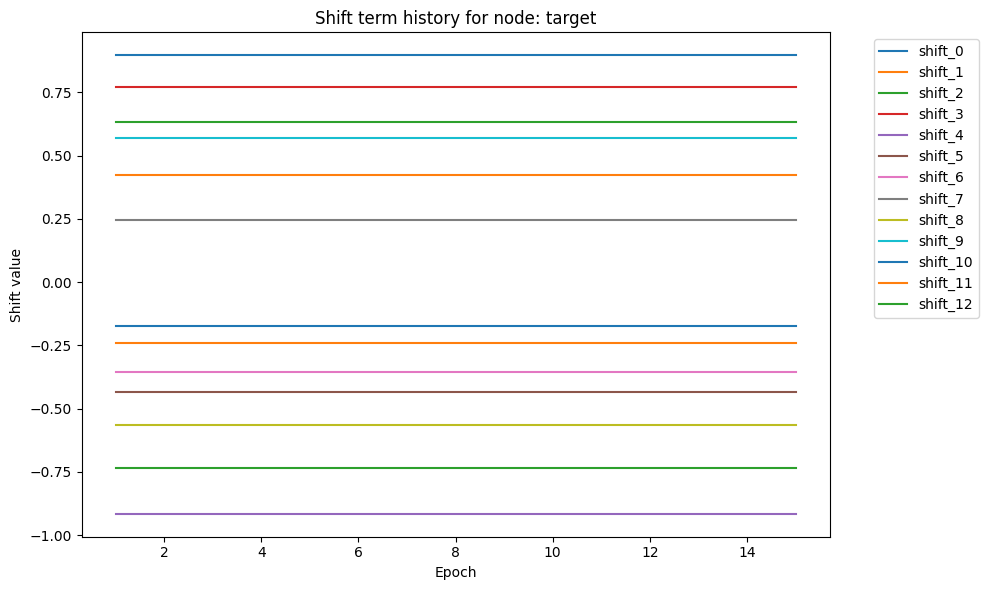

In [16]:
plot_shift_histories(linear_shift)


[INFO] Loaded training/validation histories for 14 nodes.


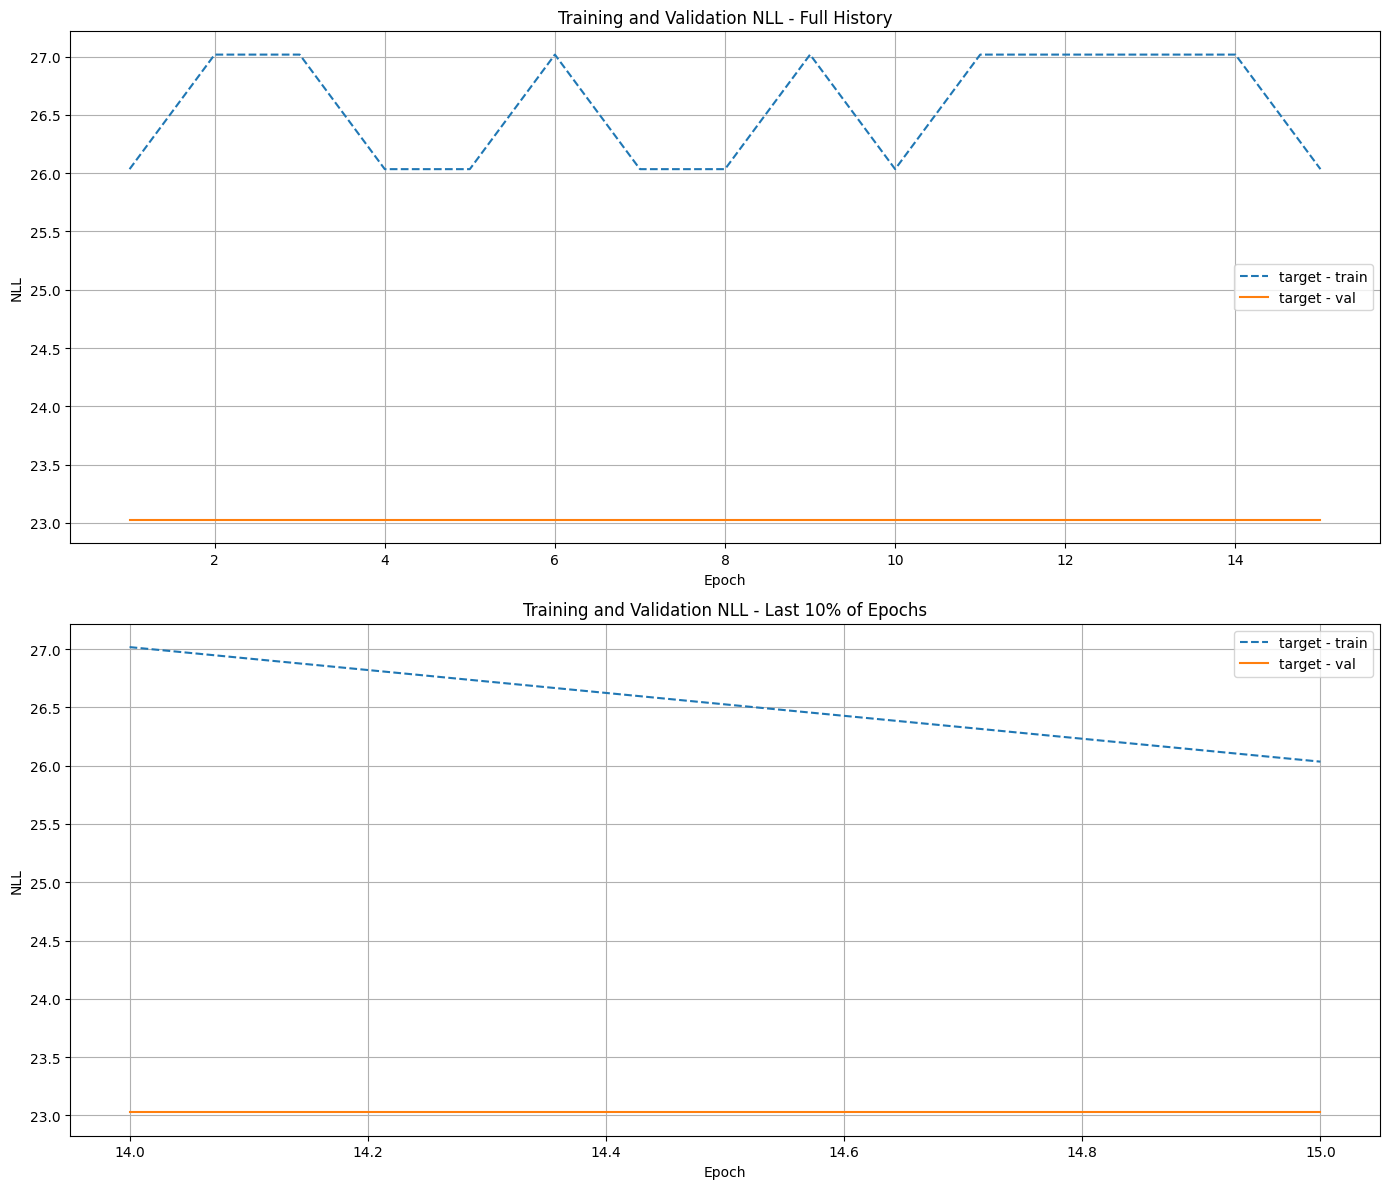

In [20]:
td_model.plot_history('target')

In [19]:
# x1-> x2, x1-> x3, x2-> x3
true_coeffs = {'x2': [2],'x3': [-0.2, 0.3]}

for node in conf_dict:
    print(f'\n----*----------*-------------*--------check LS of {node} ------------*-----------------*-------------------*--')
    
    if conf_dict[node]['node_type'] == 'source':
        print(f"Node type :source")
        continue
    
    # Paths
    NODE_DIR = os.path.join(EXPERIMENT_DIR, f'{node}')
    # Load saved shifts
    shift_path = os.path.join(NODE_DIR, "linear_shifts_all_epochs.json")
    with open(shift_path, 'r') as f:
        all_shift_weights = json.load(f)

    # Sort epochs numerically
    epochs = sorted(all_shift_weights.keys(), key=lambda x: int(x.split('_')[1]))

    # Number of shifts (incoming edges) for this node
    example_epoch = all_shift_weights[epochs[0]]
    num_shifts = len(example_epoch)

    # Plot per shift (incoming edge)
    for shifts_idx in range(num_shifts):
        
        if node=='x3':
            shift_name = f"shift_{1}"
        else:
            shift_name = f"shift_{shifts_idx}"
        weights_over_time = []

        for epoch in epochs:
            weight_matrix = np.array(all_shift_weights[epoch][shift_name])  # shape: [out_features, in_features]
            avg_weight = weight_matrix.mean()
            weights_over_time.append(avg_weight)

        plt.figure()
        plt.plot(range(1, len(epochs) + 1), weights_over_time)

        # If this node has a true coefficient for this shift, draw a horizontal red line
        if node in true_coeffs:
            true_val = true_coeffs[node][shifts_idx]
            plt.axhline(y=true_val, color='r', linestyle='--', label=f"True coeff = {true_val}")
            plt.legend()

        plt.title(f"Linear Shift Weights in h({node}), ")
        plt.xlabel("Epoch")
        plt.ylabel(fr'$\hat{{\beta}}_{{{conf_dict[node]["parents"][shifts_idx]}}}$')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

NameError: name 'conf_dict' is not defined

In [ ]:
td_model.show_samples_vs_true(train_df)